In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv('../datasets/Aqua01/Aqua01.csv')
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,"Fri, July 26, 2019, 6:33:23 PM",-,0,-,-,13.82,3.55,16
1,"Fri, July 26, 2019, 6:46:21 PM",3.83,-,-,0.0002,13.49,3.45,19
2,"Mon, July 29, 2019, 12:30:20 PM",3.06,-,-,0,13.54,3.54,22
3,"Mon, July 29, 2019, 1:10:14 PM",4.71,-,-,0.0017,13.58,3.14,24
4,"Mon, July 29, 2019, 2:00:09 PM",5.19,-,-,0.0052,13.22,2.77,23


In [31]:
dataset.shape

(931, 8)

In [32]:
dataset.isnull().sum()

Time                     0
pH (moles/L)             0
DO (mg/L)                0
Water Temperature (℃)    0
Ammonia (mg/L)           0
Battery (Volts)          0
Solar (Volts)            0
Signal Strength (dB)     0
dtype: int64

In [33]:
dataset = dataset.replace('-', np.nan)

In [34]:
dataset.isnull().sum()

Time                       0
pH (moles/L)               1
DO (mg/L)                106
Water Temperature (℃)    126
Ammonia (mg/L)             1
Battery (Volts)            0
Solar (Volts)              0
Signal Strength (dB)       0
dtype: int64

In [35]:
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [36]:
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,2019-07-26 18:33:23,NaN,0,NaN,NaN,13.82,3.55,16
1,2019-07-26 18:46:21,3.83,NaN,NaN,0.0002,13.49,3.45,19
2,2019-07-29 12:30:20,3.06,NaN,NaN,0,13.54,3.54,22
3,2019-07-29 13:10:14,4.71,NaN,NaN,0.0017,13.58,3.14,24
4,2019-07-29 14:00:09,5.19,NaN,NaN,0.0052,13.22,2.77,23


In [37]:
dataset[dataset.columns[1:8]] = dataset[dataset.columns[1:8]].apply(pd.to_numeric)

In [38]:
dataset1 = dataset.fillna(-1)

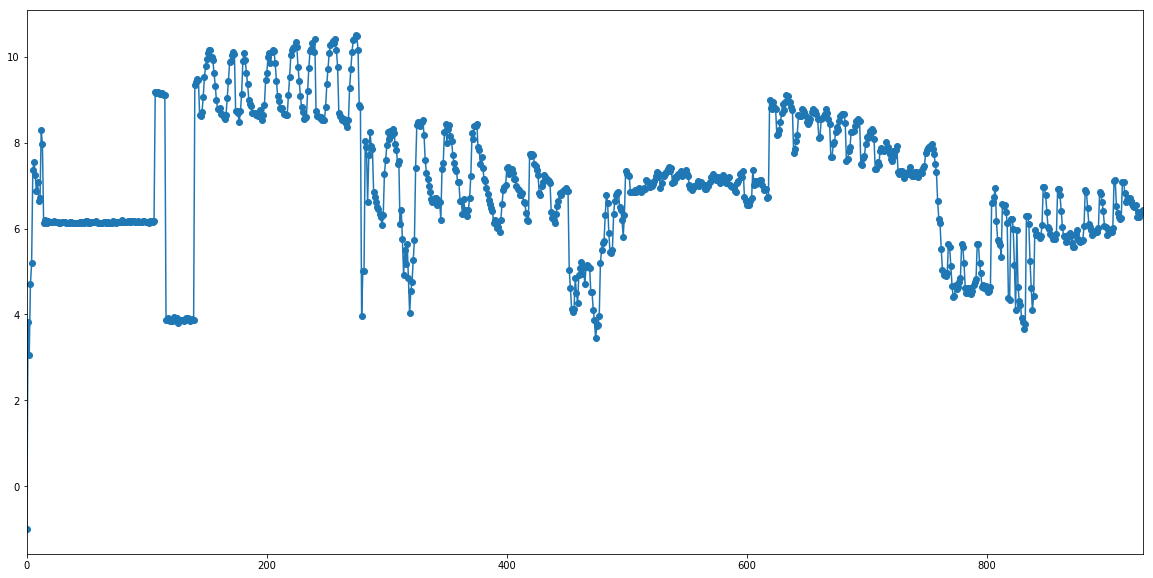

In [39]:
dataset1[dataset1.columns[1]].plot(figsize = (20,10), marker = 'o', linestyle = '-')

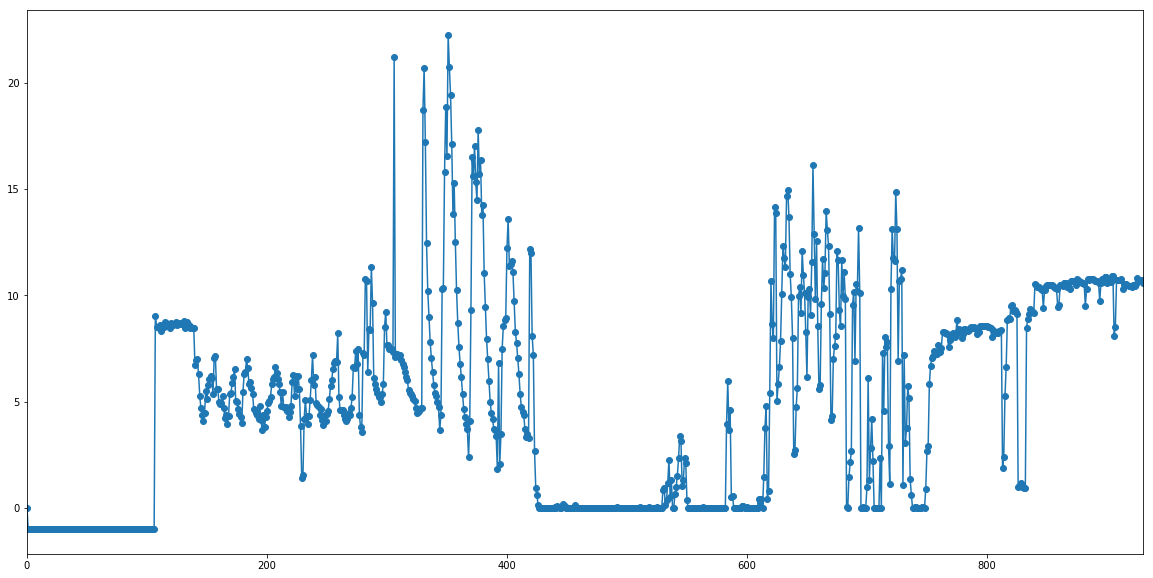

In [40]:
dataset1[dataset1.columns[2]].plot(figsize = (20,10), marker = 'o', linestyle = '-')

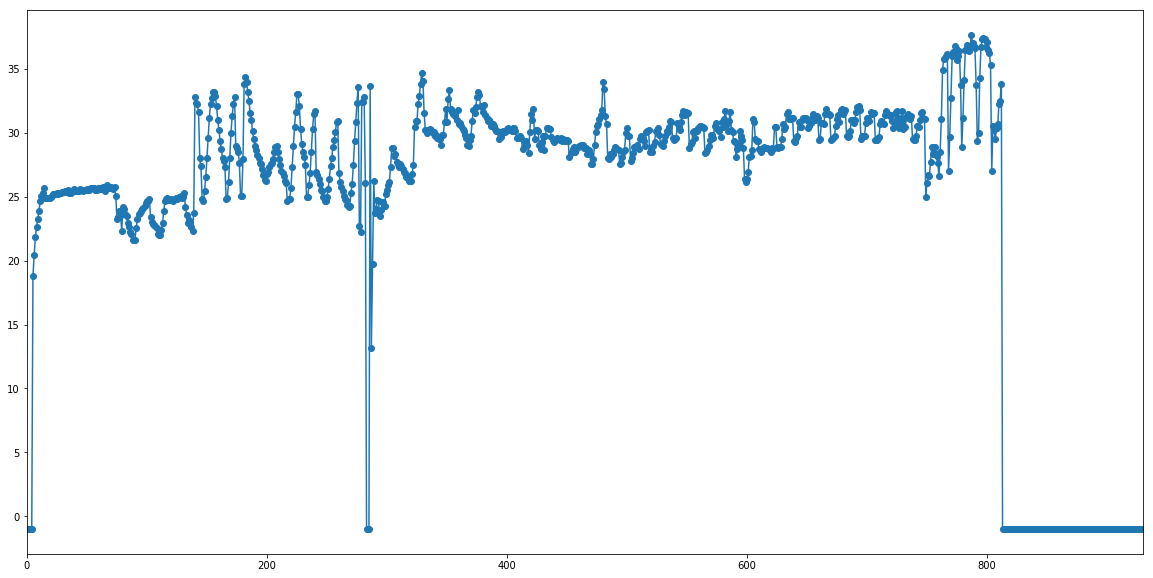

In [41]:
dataset1[dataset1.columns[3]].plot(figsize = (20,10), marker = 'o', linestyle = '-')

In [42]:
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,2019-07-26 18:33:23,NaN,0.0,NaN,NaN,13.82,3.55,16
1,2019-07-26 18:46:21,3.83,NaN,NaN,0.0002,13.49,3.45,19
2,2019-07-29 12:30:20,3.06,NaN,NaN,0.0000,13.54,3.54,22
3,2019-07-29 13:10:14,4.71,NaN,NaN,0.0017,13.58,3.14,24
4,2019-07-29 14:00:09,5.19,NaN,NaN,0.0052,13.22,2.77,23


In [43]:
dataset = dataset.sort_values(by = ['Time'])

In [44]:
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,2019-07-26 18:33:23,NaN,0.0,NaN,NaN,13.82,3.55,16
1,2019-07-26 18:46:21,3.83,NaN,NaN,0.0002,13.49,3.45,19
2,2019-07-29 12:30:20,3.06,NaN,NaN,0.0000,13.54,3.54,22
3,2019-07-29 13:10:14,4.71,NaN,NaN,0.0017,13.58,3.14,24
4,2019-07-29 14:00:09,5.19,NaN,NaN,0.0052,13.22,2.77,23


In [45]:
window_start = dataset.loc[0]['Time']
window_start = window_start.replace(minute = 0, second = 0)
time_end = dataset.loc[dataset.shape[0]-1]['Time']
time_end = time_end.replace(minute = 59, second = 59)

In [46]:
window_start

Timestamp('2019-07-26 18:00:00')

In [47]:
window_size = 3599

In [48]:
import datetime
window_end = window_start + datetime.timedelta(seconds = window_size)

In [49]:
print('window_start:',window_start,'\nwindow_end:',window_end,'\ntime_end:',time_end)

window_start: 2019-07-26 18:00:00 
window_end: 2019-07-26 18:59:59 
time_end: 2019-11-18 15:59:59


In [50]:
dataset_final = pd.DataFrame(columns = [dataset.columns])

In [ ]:
for window_end <= time_end:
    

In [28]:
type(dataset.columns[1])

str

                       pH (moles/L)  DO (mg/L)  Water Temperature (℃)  \
pH (moles/L)               1.000000   0.065214               0.052969   
DO (mg/L)                  0.065214   1.000000               0.163496   
Water Temperature (℃)      0.052969   0.163496               1.000000   
Ammonia (mg/L)             0.755344   0.110713               0.074567   
Battery (Volts)           -0.008235   0.107743               0.365190   
Solar (Volts)             -0.290352   0.254324              -0.089782   
Signal Strength (dB)       0.424837  -0.177704              -0.178424   

                       Ammonia (mg/L)  Battery (Volts)  Solar (Volts)  \
pH (moles/L)                 0.755344        -0.008235      -0.290352   
DO (mg/L)                    0.110713         0.107743       0.254324   
Water Temperature (℃)        0.074567         0.365190      -0.089782   
Ammonia (mg/L)               1.000000         0.081227      -0.222826   
Battery (Volts)              0.081227         1.00

KeyError: 'Outcome'

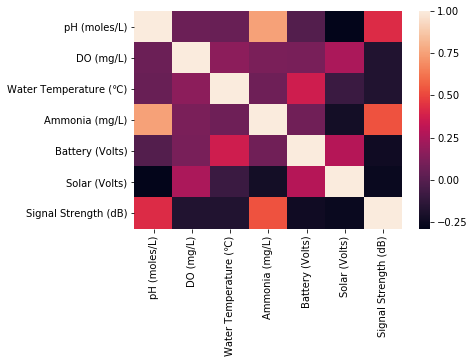

In [51]:
import seaborn as sns
VarCorr = dataset.loc[:,dataset.columns!='Time'].corr()
tempdf=pd.DataFrame(VarCorr)
print(VarCorr)
sns.heatmap(VarCorr,xticklabels=VarCorr.columns,yticklabels=VarCorr.columns)
cor_target = abs(VarCorr["Outcome"])
print(cor_target)

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [169]:
dataset = pd.read_csv('../datasets/Aqua01/Aqua01.csv')
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,"Fri, July 26, 2019, 6:33:23 PM",-,0,-,-,13.82,3.55,16
1,"Fri, July 26, 2019, 6:46:21 PM",3.83,-,-,0.0002,13.49,3.45,19
2,"Mon, July 29, 2019, 12:30:20 PM",3.06,-,-,0,13.54,3.54,22
3,"Mon, July 29, 2019, 1:10:14 PM",4.71,-,-,0.0017,13.58,3.14,24
4,"Mon, July 29, 2019, 2:00:09 PM",5.19,-,-,0.0052,13.22,2.77,23


In [170]:
dataset = dataset.replace('-', np.nan)
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,"Fri, July 26, 2019, 6:33:23 PM",NaN,0,NaN,NaN,13.82,3.55,16
1,"Fri, July 26, 2019, 6:46:21 PM",3.83,NaN,NaN,0.0002,13.49,3.45,19
2,"Mon, July 29, 2019, 12:30:20 PM",3.06,NaN,NaN,0,13.54,3.54,22
3,"Mon, July 29, 2019, 1:10:14 PM",4.71,NaN,NaN,0.0017,13.58,3.14,24
4,"Mon, July 29, 2019, 2:00:09 PM",5.19,NaN,NaN,0.0052,13.22,2.77,23


In [171]:
dataset.dtypes

Time                      object
pH (moles/L)              object
DO (mg/L)                 object
Water Temperature (℃)     object
Ammonia (mg/L)            object
Battery (Volts)          float64
Solar (Volts)            float64
Signal Strength (dB)       int64
dtype: object

In [172]:
#convert datatype of all the columns to it's specific type
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset[dataset.columns[1:5]] = dataset[dataset.columns[1:5]].apply(pd.to_numeric)
dataset.dtypes

Time                     datetime64[ns]
pH (moles/L)                    float64
DO (mg/L)                       float64
Water Temperature (℃)           float64
Ammonia (mg/L)                  float64
Battery (Volts)                 float64
Solar (Volts)                   float64
Signal Strength (dB)              int64
dtype: object

In [173]:
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,2019-07-26 18:33:23,NaN,0.0,NaN,NaN,13.82,3.55,16
1,2019-07-26 18:46:21,3.83,NaN,NaN,0.0002,13.49,3.45,19
2,2019-07-29 12:30:20,3.06,NaN,NaN,0.0000,13.54,3.54,22
3,2019-07-29 13:10:14,4.71,NaN,NaN,0.0017,13.58,3.14,24
4,2019-07-29 14:00:09,5.19,NaN,NaN,0.0052,13.22,2.77,23


In [174]:
dataset.tail()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
926,2019-11-18 12:00:08,6.38,10.71,NaN,0.0002,14.07,17.79,24
927,2019-11-18 13:00:09,6.28,10.73,NaN,0.0002,14.00,19.42,24
928,2019-11-18 14:00:06,6.33,10.70,NaN,0.0002,14.29,15.71,22
929,2019-11-18 15:00:06,6.42,10.70,NaN,0.0002,14.19,13.22,25
930,2019-11-18 15:13:54,6.43,10.58,NaN,0.0002,14.27,13.29,23


In [175]:
dataset.index = dataset['Time']
del dataset['Time']

In [176]:
dataset = dataset.resample('h').mean()
dataset.head(20)

,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
Time,,,,,,,
2019-07-26 18:00:00,3.83,0.0,NaN,0.0002,13.655,3.5,17.5
2019-07-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
dataset.isnull().sum()

pH (moles/L)             1919
DO (mg/L)                2018
Water Temperature (℃)    2030
Ammonia (mg/L)           1919
Battery (Volts)          1919
Solar (Volts)            1919
Signal Strength (dB)     1919
dtype: int64

Text(0.5, 0, 'Time')

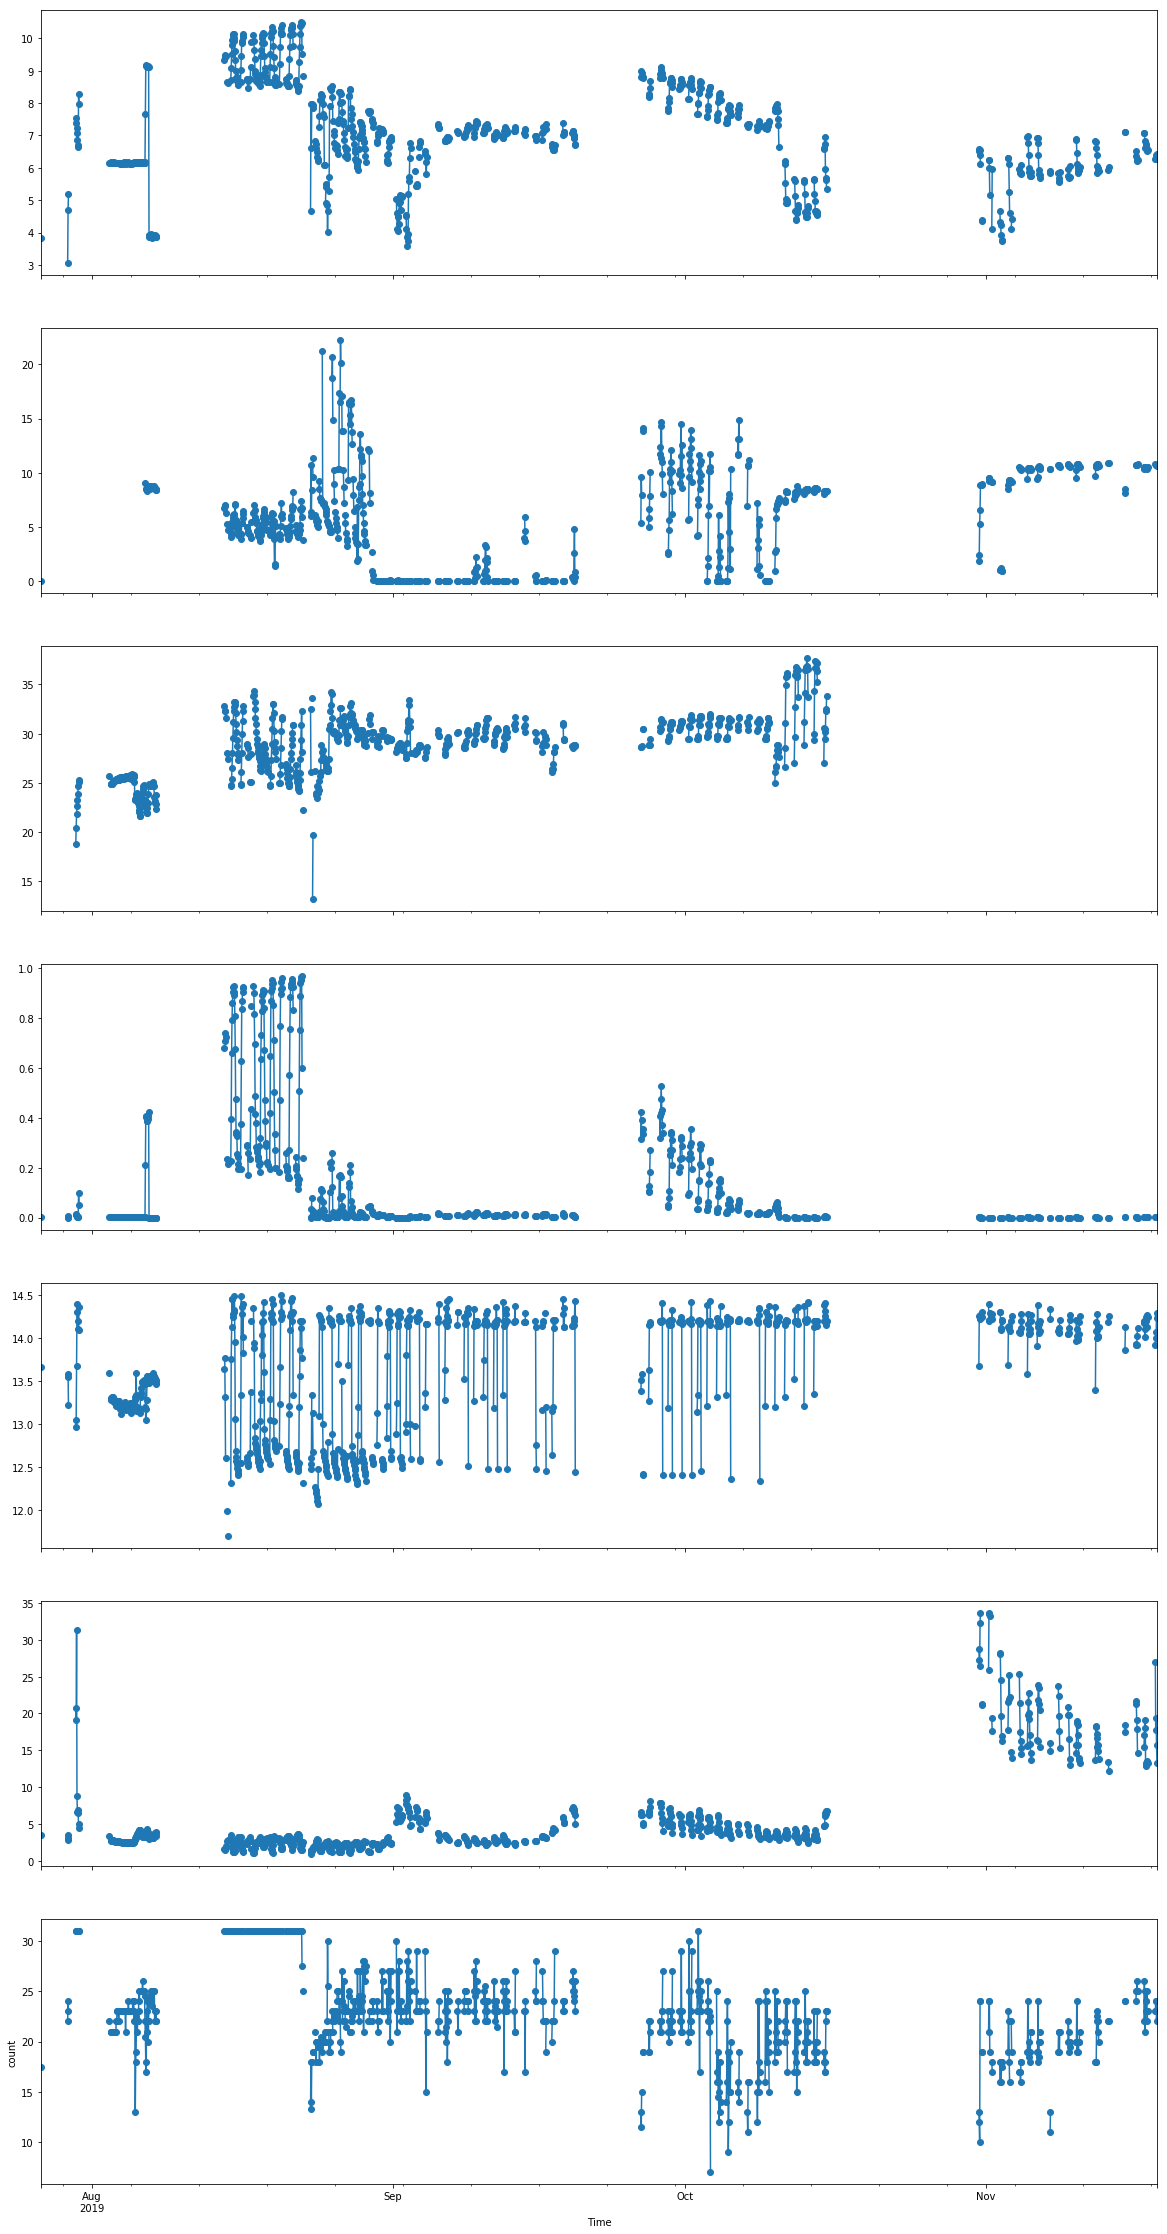

In [178]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, sharex = True, figsize = (20,40))
ax1 = dataset[dataset.columns[0]].plot(ax = axes[0], marker ='o')
plt.ylabel('count')
ax2 = dataset[dataset.columns[1]].plot(ax = axes[1], marker ='o')
plt.ylabel('count')
ax3 = dataset[dataset.columns[2]].plot(ax = axes[2], marker ='o')
ax4 = dataset[dataset.columns[3]].plot(ax = axes[3], marker ='o')
ax5 = dataset[dataset.columns[4]].plot(ax = axes[4], marker ='o')
ax6 = dataset[dataset.columns[5]].plot(ax = axes[5], marker ='o')
ax7 = dataset[dataset.columns[6]].plot(ax = axes[6], marker ='o')
plt.xlabel('Time')

In [179]:
dataset = dataset.dropna(subset = [dataset.columns[6]])
dataset.isnull().sum()

pH (moles/L)               0
DO (mg/L)                 99
Water Temperature (℃)    111
Ammonia (mg/L)             0
Battery (Volts)            0
Solar (Volts)              0
Signal Strength (dB)       0
dtype: int64

In [180]:
dataset.head()

,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
Time,,,,,,,
2019-07-26 18:00:00,3.83,0.0,NaN,0.0002,13.655,3.50,17.5
2019-07-29 12:00:00,3.06,NaN,NaN,0.0000,13.540,3.54,22.0
2019-07-29 13:00:00,4.71,NaN,NaN,0.0017,13.580,3.14,24.0
2019-07-29 14:00:00,5.19,NaN,NaN,0.0052,13.220,2.77,23.0
2019-07-30 08:00:00,7.37,NaN,18.82,0.0084,12.960,20.81,31.0


Text(0.5, 0, 'Time')

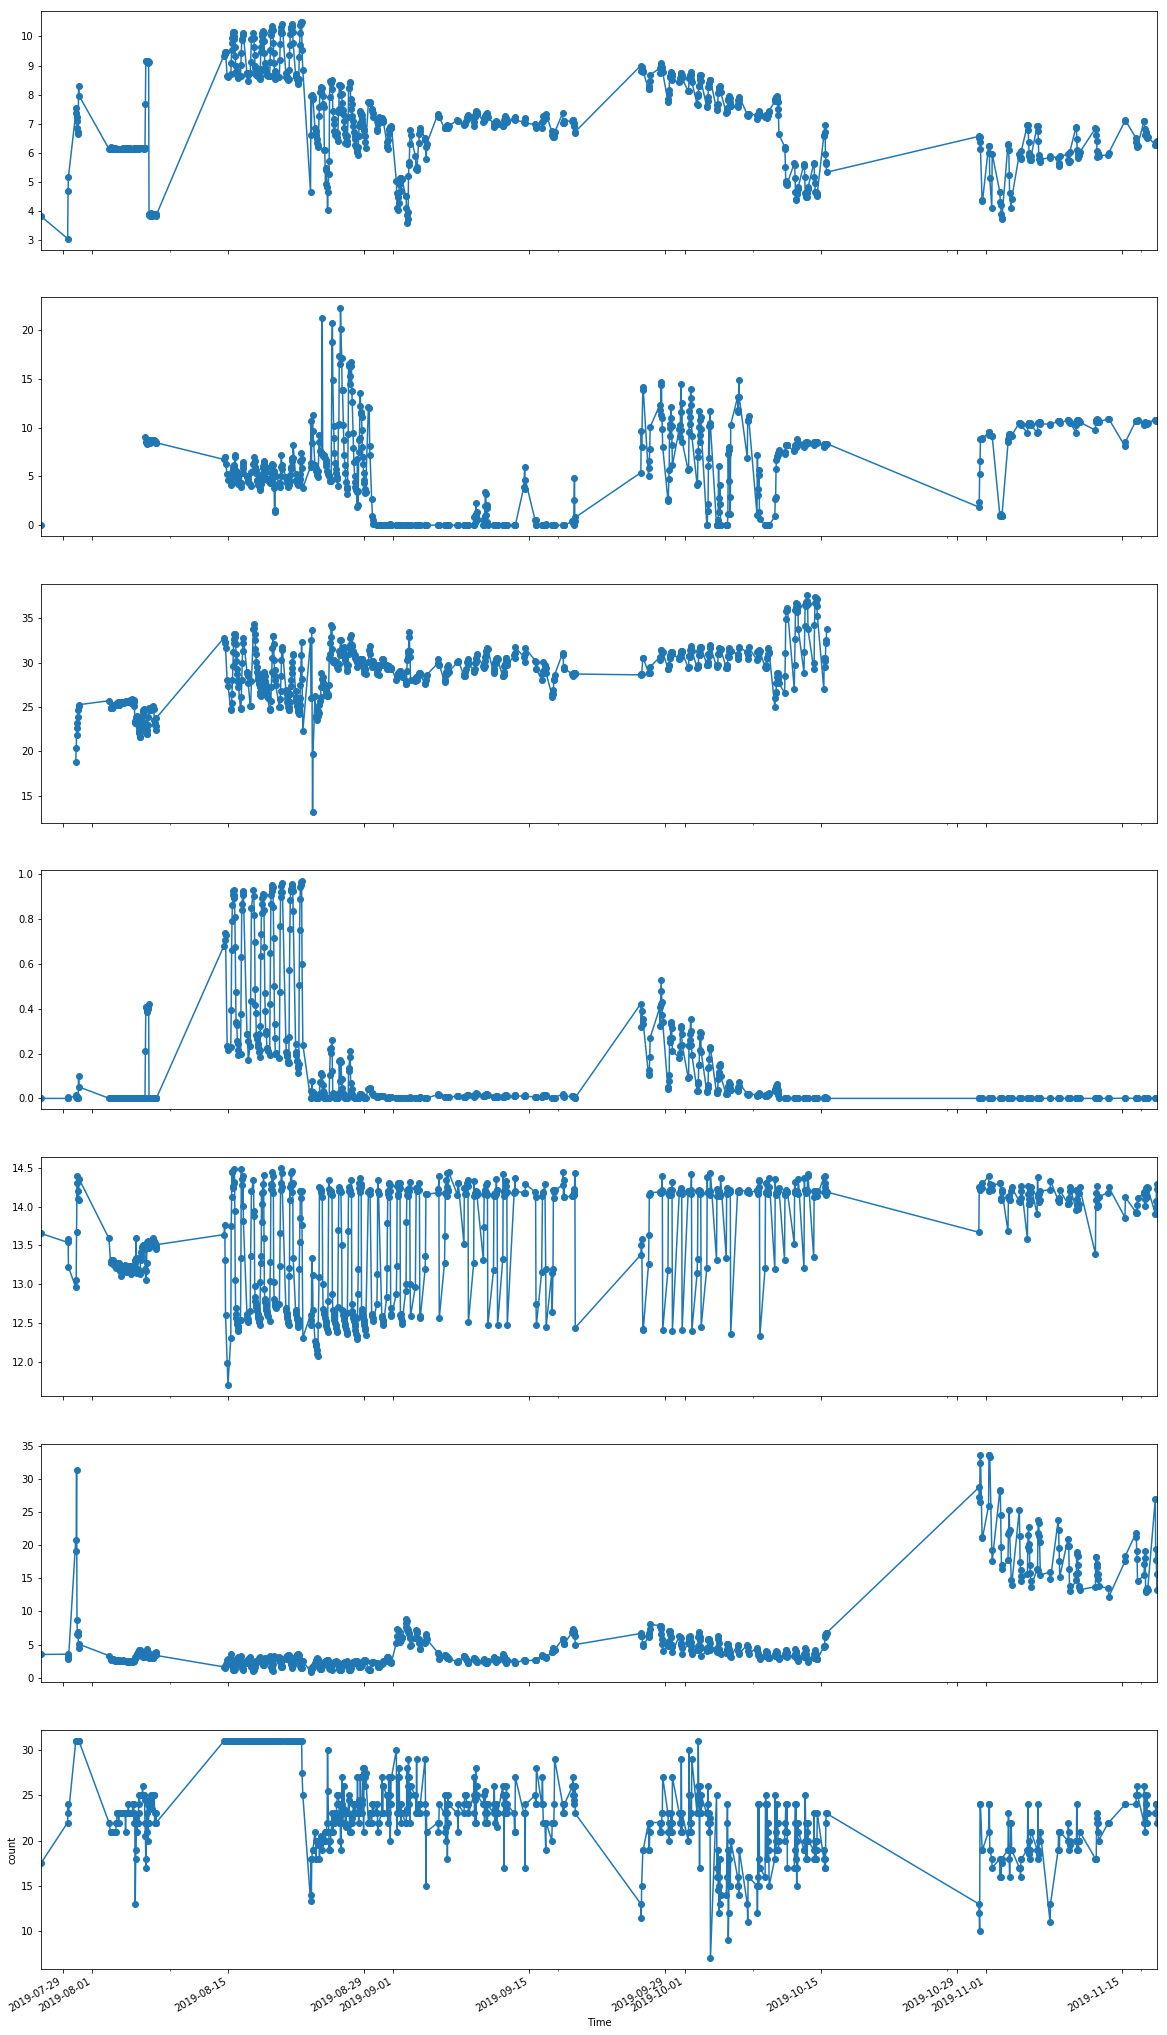

In [181]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, sharex = True, figsize = (20,40))
ax1 = dataset[dataset.columns[0]].plot(ax = axes[0], marker ='o')
ax2 = dataset[dataset.columns[1]].plot(ax = axes[1], marker ='o')
ax3 = dataset[dataset.columns[2]].plot(ax = axes[2], marker ='o')
ax4 = dataset[dataset.columns[3]].plot(ax = axes[3], marker ='o')
ax5 = dataset[dataset.columns[4]].plot(ax = axes[4], marker ='o')
ax6 = dataset[dataset.columns[5]].plot(ax = axes[5], marker ='o')
ax7 = dataset[dataset.columns[6]].plot(ax = axes[6], marker ='o')
plt.ylabel('count')
plt.xlabel('Time')

In [182]:
from missingpy import KNNImputer
imputer = KNNImputer()
dataset[dataset.columns] = imputer.fit_transform(dataset[dataset.columns])

/anaconda3/lib/python3.7/site-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [183]:
dataset.isnull().sum()

pH (moles/L)             0
DO (mg/L)                0
Water Temperature (℃)    0
Ammonia (mg/L)           0
Battery (Volts)          0
Solar (Volts)            0
Signal Strength (dB)     0
dtype: int64

In [184]:
dataset.head(10)

,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
Time,,,,,,,
2019-07-26 18:00:00,3.83,0.000,27.292,0.0002,13.655,3.50,17.5
2019-07-29 12:00:00,3.06,8.501,23.008,0.0000,13.540,3.54,22.0
2019-07-29 13:00:00,4.71,8.518,27.014,0.0017,13.580,3.14,24.0
2019-07-29 14:00:00,5.19,4.124,25.506,0.0052,13.220,2.77,23.0
2019-07-30 08:00:00,7.37,10.638,18.820,0.0084,12.960,20.81,31.0
2019-07-30 09:00:00,7.54,10.638,20.400,0.0139,13.050,19.12,31.0
2019-07-30 10:00:00,7.24,8.998,21.820,0.0078,13.670,31.40,31.0
2019-07-30 11:00:00,6.87,3.384,22.610,0.0035,14.300,8.77,31.0
2019-07-30 12:00:00,7.08,4.258,23.230,0.0060,14.390,6.59,31.0


Text(0.5, 0, 'Time')

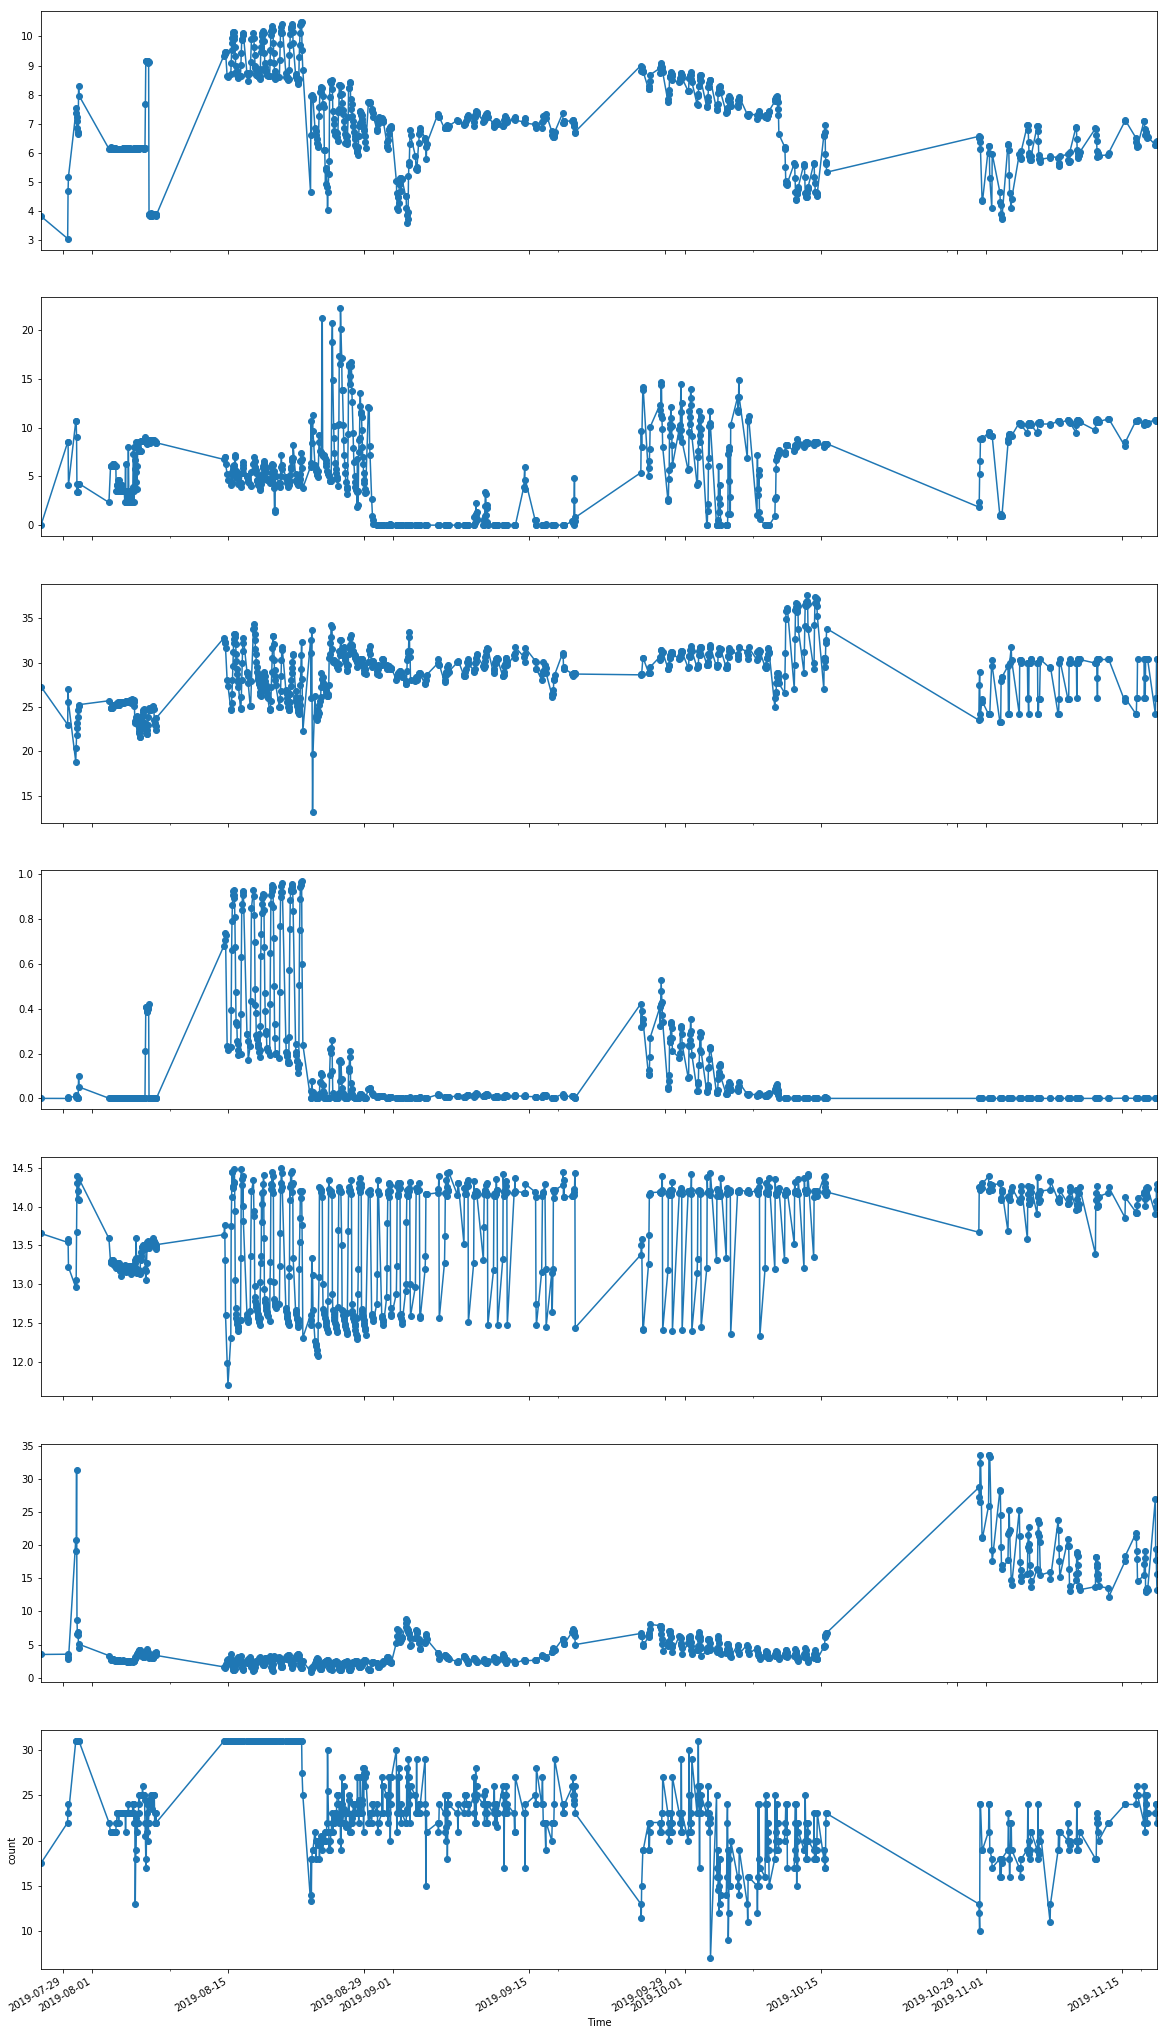

In [186]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, sharex = True, figsize = (20,40))
ax1 = dataset[dataset.columns[0]].plot(ax = axes[0], marker ='o')
ax2 = dataset[dataset.columns[1]].plot(ax = axes[1], marker ='o')
ax3 = dataset[dataset.columns[2]].plot(ax = axes[2], marker ='o')
ax4 = dataset[dataset.columns[3]].plot(ax = axes[3], marker ='o')
ax5 = dataset[dataset.columns[4]].plot(ax = axes[4], marker ='o')
ax6 = dataset[dataset.columns[5]].plot(ax = axes[5], marker ='o')
ax7 = dataset[dataset.columns[6]].plot(ax = axes[6], marker ='o')
plt.ylabel('count')
plt.xlabel('Time')

In [187]:
training_set = dataset.iloc[:, 0:1]

In [188]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0,1), copy = True)  #these parameter is default :) 
train = mms.fit_transform(training_set)

In [189]:
train

array([[0.1033557 ],
       [0.        ],
       [0.22147651],
       [0.28590604],
       [0.57852349],
       [0.60134228],
       [0.56107383],
       [0.5114094 ],
       [0.53959732],
       [0.48053691],
       [0.48993289],
       [0.70201342],
       [0.6590604 ],
       [0.41342282],
       [0.42013423],
       [0.41610738],
       [0.41342282],
       [0.41744966],
       [0.41610738],
       [0.41610738],
       [0.4147651 ],
       [0.41610738],
       [0.41879195],
       [0.41610738],
       [0.41610738],
       [0.41610738],
       [0.41342282],
       [0.41342282],
       [0.4147651 ],
       [0.4147651 ],
       [0.4147651 ],
       [0.4147651 ],
       [0.41342282],
       [0.41342282],
       [0.41342282],
       [0.4147651 ],
       [0.4147651 ],
       [0.41208054],
       [0.41342282],
       [0.41342282],
       [0.41342282],
       [0.41342282],
       [0.41208054],
       [0.4147651 ],
       [0.41208054],
       [0.41610738],
       [0.41610738],
       [0.413

In [190]:
timestep = 60
X_train = []
y_train = []

for i in range(timestep, len(train)):
    X_train.append(train[i-timestep: i, 0])
    y_train.append(train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [191]:
#reshaping it is useful when we have more than 1 number of indicator that influence the prediction

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [196]:
X_train.shape

(779, 60, 1)

In [197]:
y_train.shape

(779,)

In [192]:
#import packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [193]:
regressor = Sequential()
#1st LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#2nd LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#3rd LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#4th LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = False)) #default is false
regressor.add(Dropout(0.2))

#outputlayer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [194]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [195]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
779/779 [==============================] - 6s 7ms/step - loss: 0.0884
Epoch 2/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0307
Epoch 3/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0258
Epoch 4/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0264
Epoch 5/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0258
Epoch 6/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0263
Epoch 7/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0256
Epoch 8/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0233
Epoch 9/100
779/779 [==============================] - 4s 5ms/step - loss: 0.0228
Epoch 10/100
779/779 [==============================] - 4s 6ms/step - loss: 0.0229
Epoch 11/100
779/779 [==============================] - 4s 6ms/step - loss: 0.0231
Epoch 12/100
779/779 [==========================

779/779 [==============================] - 4s 5ms/step - loss: 0.0061
Epoch 97/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0066
Epoch 98/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0067
Epoch 99/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0064
Epoch 100/100
779/779 [==============================] - 5s 6ms/step - loss: 0.0065
